In [140]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
os.chdir('/data')
font_properties = FontProperties(fname='SimHei.ttf', size=12)
df = pd.read_csv('xiaohongshu_main.csv')
df1 = df[df['观看量'].notna()]
df1['观看量'].isnull().sum()

0

In [142]:
df1.head()

,笔记名称,笔记链接,发布日期,观看量,评论数,点赞量,分享数,收藏数,直接涨粉数,标签,类别
0,Marketing Data Scientist 必须掌握的知识,https://www.xiaohongshu.com/explore/65361e7800...,10/23/2023,612.0,0.0,3.0,0.0,2.0,3.0,NaN,干货分享
1,休斯顿数据科学家线下交流会,https://www.xiaohongshu.com/explore/6536803400...,10/23/2023,2102.0,5.0,19.0,10.0,7.0,14.0,NaN,线下交流会
2,备战春招必看！数据科学一站式训练营推荐,https://www.xiaohongshu.com/explore/65376e5000...,10/24/2023,511.0,0.0,1.0,0.0,0.0,0.0,NaN,报名截止日期
3,入职美国银行业 DS 半年，我都学到了什么？,https://www.xiaohongshu.com/explore/6538d29300...,10/25/2023,871.0,1.0,3.0,0.0,5.0,1.0,NaN,经验分享
4,DS 线下交流会！休斯顿地区的同学看过来！,https://www.xiaohongshu.com/explore/653b5a5600...,10/27/2023,542.0,0.0,0.0,0.0,0.0,0.0,NaN,线下交流会


In [143]:
df2 = df1.groupby('类别')['观看量'].mean()

In [144]:
print(df2)

类别
其他          1008.000000
周三直播预告       467.000000
干货分享         657.562500
报名截止日期       522.222222
直播通知         537.600000
线下交流会        882.250000
经验分享         712.555556
经验分享直播预告     688.000000
课程宣传         527.750000
课程直播预告       533.000000
Name: 观看量, dtype: float64


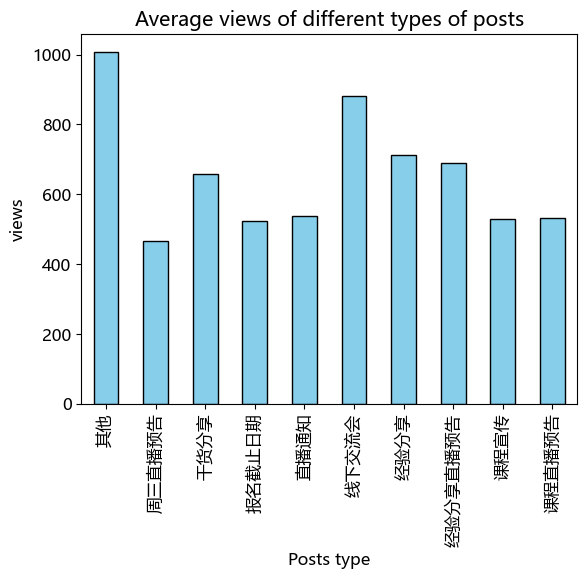

In [145]:

font = {'family': 'Microsoft YaHei', 'size': 12}
plt.rc('font', **font)
df2.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average views of different types of posts')
plt.xlabel('Posts type')
plt.ylabel('views')
plt.show()

In [146]:
df1[df1['类别'] == '其他']

,笔记名称,笔记链接,发布日期,观看量,评论数,点赞量,分享数,收藏数,直接涨粉数,标签,类别
41,美国休斯顿大学健康医学 DS 课题组招人啦！,https://www.xiaohongshu.com/explore/6584ee1600...,12/21/2023,1008.0,0.0,14.0,9.0,12.0,5.0,NaN,其他


In [147]:
df3 = df1[df1['类别'] != '其他']
column_means = df3[['观看量', '评论数', '点赞量', '分享数', '收藏数', '直接涨粉数']].mean()
column_means_df = pd.DataFrame(column_means).T
print(column_means_df)
outlier = df1[df1['类别'] == '其他']
outlier_stats = outlier[['观看量', '评论数', '点赞量', '分享数', '收藏数', '直接涨粉数']]

          观看量   评论数       点赞量       分享数       收藏数  直接涨粉数
0  639.890625  0.25  1.796875  0.921875  1.234375  0.875


In [148]:
compare = pd.concat([column_means_df,outlier_stats],keys=['观看量', '评论数', '点赞量', '分享数', '收藏数', '直接涨粉数'])

In [149]:
compare = compare.reset_index(drop=True)

In [150]:
compare_reset.index = ['average', 'outlier']
compare_views = compare_reset.iloc[:,0]
compare_others = compare_reset.iloc[:,1:]

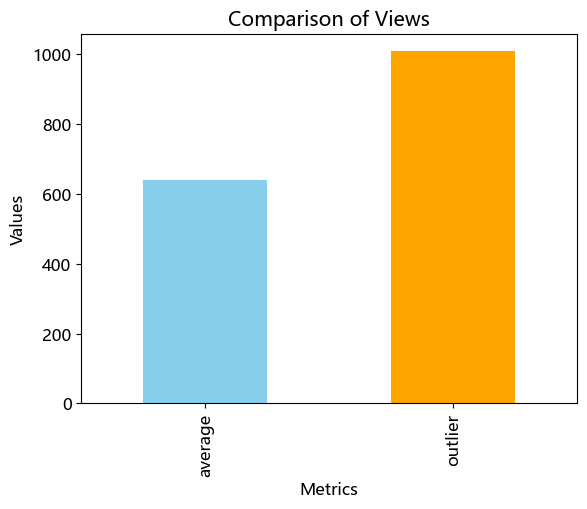

In [151]:
compare_views.T.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Comparison of Views')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

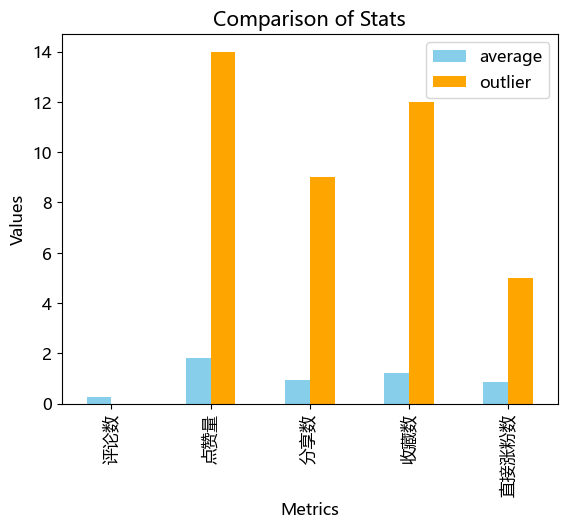

In [152]:
compare_others.T.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Comparison of Stats')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

In [154]:
df3 = df1[df1['类别'] != '其他']
df3.head()

,笔记名称,笔记链接,发布日期,观看量,评论数,点赞量,分享数,收藏数,直接涨粉数,标签,类别
0,Marketing Data Scientist 必须掌握的知识,https://www.xiaohongshu.com/explore/65361e7800...,10/23/2023,612.0,0.0,3.0,0.0,2.0,3.0,NaN,干货分享
1,休斯顿数据科学家线下交流会,https://www.xiaohongshu.com/explore/6536803400...,10/23/2023,2102.0,5.0,19.0,10.0,7.0,14.0,NaN,线下交流会
2,备战春招必看！数据科学一站式训练营推荐,https://www.xiaohongshu.com/explore/65376e5000...,10/24/2023,511.0,0.0,1.0,0.0,0.0,0.0,NaN,报名截止日期
3,入职美国银行业 DS 半年，我都学到了什么？,https://www.xiaohongshu.com/explore/6538d29300...,10/25/2023,871.0,1.0,3.0,0.0,5.0,1.0,NaN,经验分享
4,DS 线下交流会！休斯顿地区的同学看过来！,https://www.xiaohongshu.com/explore/653b5a5600...,10/27/2023,542.0,0.0,0.0,0.0,0.0,0.0,NaN,线下交流会
